# Perturbing Parameters
* Import packages
* Set plotting style

In [11]:
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
import os

In [12]:
sns.set(style="whitegrid")
import matplotlib
matplotlib.rcParams.update(
    {
        "pgf.preamble": (
            r"\usepackage{amsmath} \usepackage{dsfont} \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
        ),
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.titleweight": "bold",  # Make titles bold
        "axes.titlesize": 18,  # Increase title size
        "axes.labelsize": 16,  # Increase label size
        "xtick.labelsize": 14,  # Increase x-tick label size
        "ytick.labelsize": 14,  # Increase y-tick label size
        "legend.fontsize": 14,  # Increase legend font size
    }
)

matplotlib.rcParams["text.latex.preamble"] = (
    r"\usepackage{amsmath} \usepackage{dsfont} \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
)

# To ensure the changes take effect, you might want to add:
plt.rcParams.update(matplotlib.rcParams)

## Load Data

In [13]:
r = []
res_multiple = []
for file in os.listdir("perturbation"):
    # ignore plots
    if not file.endswith(".txt"):
        continue
    
    data = pd.read_csv("perturbation/"+file, index_col=0)
    if len(file.split("_")) != 9:
        layers, qubits, params_per_layer, rx, ry, rz, cnot ,cz, perturb_threshold, change_thresh = file.replace(".txt", "").split("_")

        data["layers"] = int(layers)
        data["qubits"] = int(qubits)
        data["params_per_layer"] = int(params_per_layer)
        data["rx"] = rx == "True"
        data["ry"] = ry == "True"
        data["rz"] = rz == "True"
        data["cnot"] = cnot == "True"
        data["cz"] = cz == "True"
        data["perturb_threshold"] = float(perturb_threshold)
        data["change_thresh"] = float(change_thresh)

        res_multiple.append(data)
res_multiple = pd.concat(res_multiple)
res_multiple = res_multiple.drop(['Layer', 'Qubit'], axis=1)
res_multiple.head()

,Run,2-Norm,Trace Norm,Diamond Norm,layers,qubits,params_per_layer,rx,ry,rz,cnot,cz,perturb_threshold,change_thresh
0,0,0.031415,0.041315,0.000987,1,1,2,False,True,True,False,False,0.01,0.5
1,1,0.031415,0.030040,0.000987,1,1,2,False,True,True,False,False,0.01,0.5
2,2,0.031415,0.017653,0.000987,1,1,2,False,True,True,False,False,0.01,0.5
3,3,0.031415,0.062524,0.000987,1,1,2,False,True,True,False,False,0.01,0.5
4,4,0.031415,0.038533,0.000987,1,1,2,False,True,True,False,False,0.01,0.5


In [14]:
res_multiple.groupby(["layers", "qubits"])[['Diamond Norm']].mean()

Diamond Norm
layers qubits              
1      1           0.000508
       2           0.001674
       3           0.003523
       4           0.006592
2      1           0.001075
       2           0.004238
       3           0.008787
       4           0.015117
3      1           0.001624
       2           0.006664
       3           0.013540
       4           0.023307
4      1           0.002343
       2           0.009106
       3           0.018567
       4           0.031373
5      1           0.002857
       2           0.011467
       3           0.023099
       4           0.039414

In [15]:
res_multiple.groupby(["layers", "qubits", "rx", "ry", "rz", "cnot", "cz", "perturb_threshold", "change_thresh"])[["2-Norm", "Trace Norm", "Diamond Norm"]].agg(["mean", "std"]).sort_values(['perturb_threshold', 'change_thresh']).head()

2-Norm  \
                                                                                 mean   
layers qubits rx    ry    rz    cnot  cz    perturb_threshold change_thresh             
1      1      False True  True  False False 0.001             0.5            0.007135   
              True  False True  False False 0.001             0.5            0.005138   
                    True  False False False 0.001             0.5            0.007135   
                          True  False False 0.001             0.5            0.004473   
       2      False False True  False False 0.001             0.5            0.005138   

                                                                                       \
                                                                                  std   
layers qubits rx    ry    rz    cnot  cz    perturb_threshold change_thresh             
1      1      False True  True  False False 0.001             0.5            0.089257   
              True  False True  False False 0.001             0.5            0.063146   
                    True  False False False 0.001             0.5            0.089257   
                          True  False False 0.001             0.5            0.051559   
       2      False False True  False False 0.001             0.5            0.063146   

                                                                            Trace Norm  \
                                                                                  mean   
layers qubits rx    ry    rz    cnot  cz    perturb_threshold change_thresh              
1      1      False True  True  False False 0.001             0.5             0.011816   
              True  False True  False False 0.001             0.5             0.008162   
                    True  False False False 0.001             0.5             0.010547   
                          True  False False 0.001             0.5             0.006427   
       2      False False True  False False 0.001             0.5             0.020554   

                                                                                       \
                                                                                  std   
layers qubits rx    ry    rz    cnot  cz    perturb_threshold change_thresh             
1      1      False True  True  False False 0.001             0.5            0.174966   
              True  False True  False False 0.001             0.5            0.126373   
                    True  False False False 0.001             0.5            0.140206   
                          True  False False 0.001             0.5            0.082047   
       2      False False True  False False 0.001             0.5            0.252585   

                                                                            Diamond Norm  \
                                                                                    mean   
layers qubits rx    ry    rz    cnot  cz    perturb_threshold change_thresh                
1      1      False True  True  False False 0.001             0.5                0.00001   
              True  False True  False False 0.001             0.5                0.00001   
                    True  False False False 0.001             0.5                0.00001   
                          True  False False 0.001             0.5                0.00001   
       2      False False True  False False 0.001             0.5                0.00001   

                                                                                           
                                                                                      std  
layers qubits rx    ry    rz    cnot  cz    perturb_threshold change_thresh                
1      1      False True  True  False False 0.001             0.5            7.109573e-19  
              True  False True  False False 0.001             0.5            7.273666e-19  
                    Tr

## Changing More Parameters

In [16]:
# create readable method reading "RX" if rx is true, "RY" if ry is true, etc
res_multiple['method_readable'] = res_multiple['rx'].apply(lambda x: "RX " if x else "") + res_multiple['ry'].apply(lambda x: "RY " if x else "") + res_multiple['rz'].apply(lambda x: "RZ " if x else "") + res_multiple['cnot'].apply(lambda x: "CNOT " if x else "") + res_multiple['cz'].apply(lambda x: "CZ" if x else "")
res_multiple['method_readable'] = res_multiple['method_readable'].apply(lambda x: x.replace("  ", " ").strip())

In [17]:
res_multiple.groupby(['layers', 'qubits', 'rx', 'ry', 'rz', 'cnot', 'cz', 'perturb_threshold', 'change_thresh'])[['2-Norm', 'Trace Norm', 'Diamond Norm']].agg(['count', 'mean', 'std'])

2-Norm  \
                                                                           count   
layers qubits rx    ry   rz   cnot  cz    perturb_threshold change_thresh          
1      1      False True True False False 0.001             0.50            1000   
                                                            0.75            1000   
                                                            0.95            1000   
                                          0.005             0.50            1000   
                                                            0.75            1000   
...                                                                          ...   
5      4      True  True True True  True  0.005             0.75           30000   
                                                            0.95           30000   
                                          0.010             0.50           30000   
                                                            0.75           30000   
                                                            0.95           30000   

                                                                                     \
                                                                               mean   
layers qubits rx    ry   rz   cnot  cz    perturb_threshold change_thresh             
1      1      False True True False False 0.001             0.50           0.007135   
                                                            0.75           0.005138   
                                                            0.95           0.005138   
                                          0.005             0.50           0.029597   
                                                            0.75           0.021660   
...                                                                             ...   
5      4      True  True True True  True  0.005             0.75           0.443340   
                                                            0.95           0.506689   
                                          0.010             0.50           0.629908   
                                                            0.75           0.771995   
                                                            0.95           0.855299   

                                                                                     \
                                                                                std   
layers qubits rx    ry   rz   cnot  cz    perturb_threshold change_thresh             
1      1      False True True False False 0.001             0.50           0.089257   
                                                            0.75           0.063146   
                                                            0.95           0.063146   
                                          0.005             0.50           0.165513   
                                                            0.75           0.108572   
...                                                                             ...   
5      4      True  True True True  True  0.005             0.75           0.629548   
                                                            0.95           0.662936   
                                          0.010             0.50           0.666479   
                                                            0.75           0.698975   
                                                            0.95           0.705690   

                                                                          Trace Norm  \
                                                                               count   
layers qubits rx    ry   rz   cnot  cz    perturb_threshold change_thresh              
1      1      False True True False False 0.001             0.50                1000   
                                                            0.75                1000   
                   

In [18]:
# outlier is everything out of 3*IQR
def get_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    # return lower and upper
    return group[group < (Q1 - 1.5 * IQR)], group[group > (Q3 + 1.5 * IQR)]

for name, group in res_multiple.groupby(['qubits', 'layers', 'method_readable', 'perturb_threshold', 'change_thresh']):
    lower, upper = (get_outliers(group['Diamond Norm']))
    lower_mean, upper_mean = lower.mean(), upper.mean()
    outliers = (len(lower) + len(upper)) / len(group)
    if outliers > 0.3:
        print("Qubits", name[0], "Layers", name[1], "Method", name[2], "Percentage Outliers", outliers, "Mean Lower", lower_mean, "Mean Upper", upper_mean)
    

Qubits 1 Layers 1 Method RX RY RZ Percentage Outliers 0.394 Mean Lower 2.37297460343698e-06 Mean Upper 0.0009796471334703341
Qubits 1 Layers 4 Method RY Percentage Outliers 0.3775 Mean Lower 0.0002467350366787001 Mean Upper 0.00222025007606
Qubits 1 Layers 5 Method RY Percentage Outliers 0.3776 Mean Lower 0.0002467350366787001 Mean Upper 0.00222025007606
Qubits 2 Layers 3 Method RX Percentage Outliers 0.367 Mean Lower 9.121329342088355e-32 Mean Upper 0.0001579115923677
Qubits 2 Layers 3 Method RX Percentage Outliers 0.3883333333333333 Mean Lower 5.669959428465883e-32 Mean Upper 0.0037136252265702946
Qubits 2 Layers 3 Method RX Percentage Outliers 0.37233333333333335 Mean Lower 9.109565398638303e-32 Mean Upper 0.015770597371044248
Qubits 2 Layers 3 Method RX CNOT Percentage Outliers 0.44066666666666665 Mean Lower 0.0002467350366787841 Mean Upper 0.006166985341579731
Qubits 2 Layers 3 Method RX CNOT Percentage Outliers 0.441 Mean Lower 0.00098687926853682 Mean Upper 0.024649696559865278


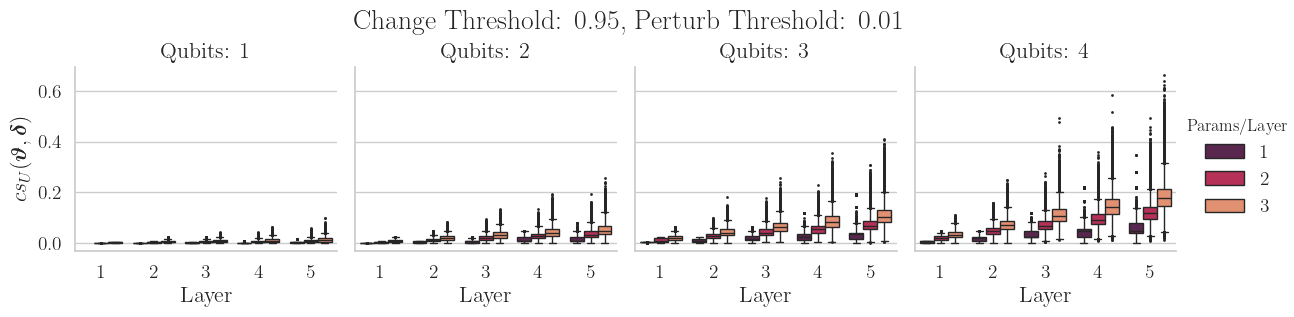

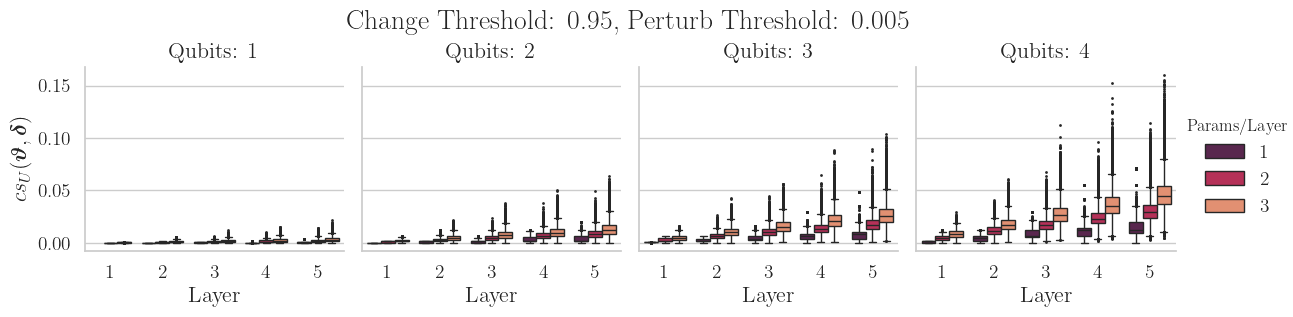

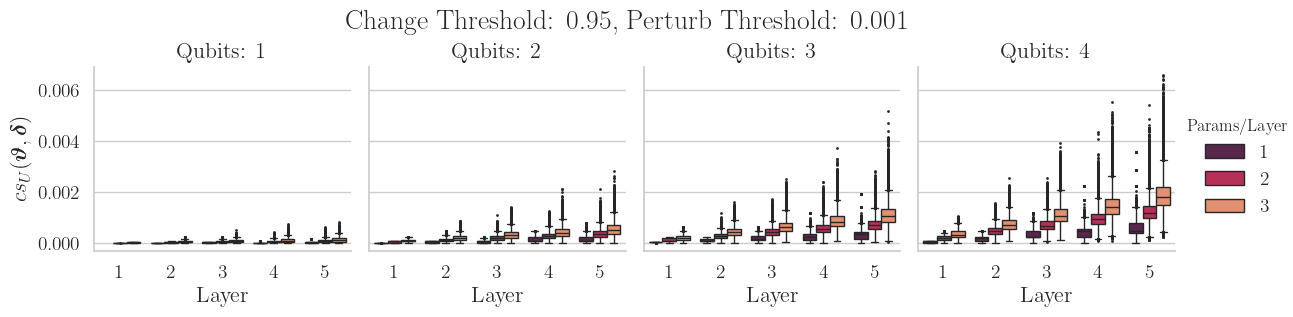

In [19]:
for change_thresh in [0.95]:
    for perturb_threshold in [0.01, 0.005, 0.001]:
        relevant = res_multiple[(res_multiple['change_thresh'] == change_thresh) & (res_multiple['perturb_threshold'] == perturb_threshold)]       

        fg = sns.FacetGrid(data=relevant, col='qubits')
        fg.map_dataframe(sns.boxplot, x='layers', y='Diamond Norm', hue='params_per_layer', palette=sns.color_palette('rocket', 3), fliersize=1)
        fg.add_legend()
        fg.set_xlabels("Layer")
        fg.set_ylabels("$cs_U(\\boldsymbol{\\vartheta}, \\boldsymbol{\\delta})$")
        # set all xlabel
        for ax in fg.axes.flat:

            ax.title.set_text("Qubits: " + ax.title.get_text()[-1])

        # legend title
        fg._legend.set_title("Params/Layer")
        # legend to the right
        fg._legend.set_bbox_to_anchor([1.02, 0.5])

        plt.suptitle(f"Change Threshold: {change_thresh}, Perturb Threshold: {perturb_threshold}", y=1.05, size=20)
        plt.savefig(f"plots/{change_thresh}_{perturb_threshold}.png", bbox_inches='tight')
    
        plt.show()